# Análise Exploratória de Dados com Python

<h2>Prof. Dr. <a href="https://www.linkedin.com/in/neylsoncrepalde/" target=”_blank”>Neylson Crepalde</a></h2>

Mais informações sobre mim em <a href="http://www.neylsoncrepalde.com" target="_blank">www.neylsoncrepalde.com</a>

---

Vamos trabalhar com análise exploratória de dados usando uma subamostra do dataset de pessoas da PNAD 2012.

Link dos dados para trabalhar: `https://github.com/neylsoncrepalde/introducao_ao_r/blob/master/dados/pes_2012.csv?raw=true`

In [1]:
import pandas as pd
import numpy as np

In [2]:
pnad = pd.read_csv("https://github.com/neylsoncrepalde/introducao_ao_r/blob/master/dados/pes_2012.csv?raw=true")

In [3]:
pnad.head()

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232


## Primeiras análises do dataset

In [4]:
pnad.shape

(362451, 9)

In [5]:
pnad['UF']

0                 Rondônia
1                 Rondônia
2                 Rondônia
3                 Rondônia
4                 Rondônia
                ...       
362446    Distrito Federal
362447    Distrito Federal
362448    Distrito Federal
362449    Distrito Federal
362450    Distrito Federal
Name: UF, Length: 362451, dtype: object

In [6]:
pnad.V0302

0         Masculino
1          Feminino
2          Feminino
3          Feminino
4          Feminino
            ...    
362446     Feminino
362447    Masculino
362448    Masculino
362449    Masculino
362450    Masculino
Name: V0302, Length: 362451, dtype: object

## Analisando variáveis qualitativas

In [6]:
pnad.V0302.head() # primeiros casos

0    Masculino
1     Feminino
2     Feminino
3     Feminino
4     Feminino
Name: V0302, dtype: object

In [8]:
pnad.V0302.tail() # últimos casos

362446     Feminino
362447    Masculino
362448    Masculino
362449    Masculino
362450    Masculino
Name: V0302, dtype: object

In [9]:
pnad.V0302.value_counts()

Feminino     186054
Masculino    176397
Name: V0302, dtype: int64

In [10]:
pnad.V0302.value_counts() / pnad.shape[0]

Feminino     0.513322
Masculino    0.486678
Name: V0302, dtype: float64

In [11]:
# Cor da pele
pnad.V0404.value_counts() / pnad.shape[0]

Parda             0.479328
Branca            0.429286
Preta             0.083101
Amarela           0.004276
Indígena          0.003959
Sem declaração    0.000050
Name: V0404, dtype: float64

## Variáveis Quantitativas

Para analisar variáveis numéricas começamos com estatísticas descritivas (média, mediana, desvio padrão, variância...)

In [12]:
# Idade
pnad.V8005.head()

0    48
1    48
2    23
3    21
4    54
Name: V8005, dtype: int64

In [13]:
pnad.V8005.mean() # média

32.63801175883085

In [14]:
np.mean(pnad.V8005) # média com numpy

32.63801175883085

In [15]:
pnad.V8005.median() # mediana

30.0

In [16]:
pnad.V8005.var() # variância

431.4064534606153

In [17]:
pnad.V8005.std() # desvio padrão

20.77032627236788

In [18]:
# Tirando várias estatísticas descritivas de uma só vez
pnad.V8005.describe()

count    362451.000000
mean         32.638012
std          20.770326
min           0.000000
25%          15.000000
50%          30.000000
75%          48.000000
max         117.000000
Name: V8005, dtype: float64

In [19]:
pnad.describe()

,V0101,V8005,V4729
count,362451.0,362451.000000,362451.000000
mean,2012.0,32.638012,543.183294
std,0.0,20.770326,260.364253
min,2012.0,0.000000,174.000000
25%,2012.0,15.000000,334.000000
50%,2012.0,30.000000,522.000000
75%,2012.0,48.000000,705.000000
max,2012.0,117.000000,1132.000000


Vamos investigar os tipos de dados que há em cada coluna

In [20]:
pnad.head()

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232


In [21]:
pnad.dtypes

V0101     int64
UF       object
V0302    object
V8005     int64
V0404    object
V4803    object
V4718    object
V4720    object
V4729     int64
dtype: object

In [22]:
# Transformar V4718 e V4720 em float
pnad['V4718'] = pd.to_numeric(pnad['V4718'], errors='coerce')
pnad['V4720'] = pd.to_numeric(pnad['V4720'], errors='coerce')

In [23]:
pnad.describe()

,V0101,V8005,V4718,V4720,V4729
count,362451.0,362451.000000,168981.000000,303634.000000,362451.000000
mean,2012.0,32.638012,1342.847628,992.282985,543.183294
std,0.0,20.770326,2656.679175,2492.988418,260.364253
min,2012.0,0.000000,0.000000,0.000000,174.000000
25%,2012.0,15.000000,622.000000,0.000000,334.000000
50%,2012.0,30.000000,800.000000,622.000000,522.000000
75%,2012.0,48.000000,1400.000000,1100.000000,705.000000
max,2012.0,117.000000,350000.000000,351600.000000,1132.000000


## Algumas análises
### Sexo X Renda (V4720)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set(style='whitegrid')

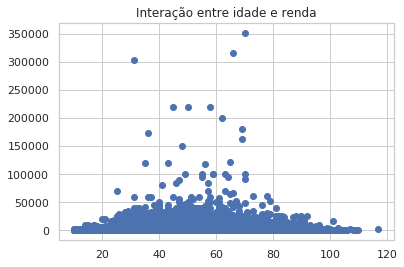

In [26]:
plt.scatter(pnad.V8005, pnad.V4720)
plt.title("Interação entre idade e renda")
plt.show()

# Algumas análises visuais

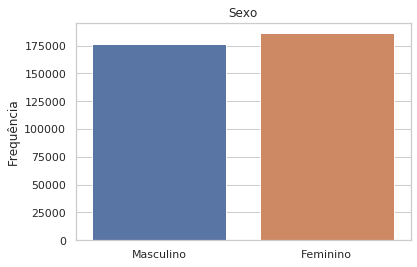

In [27]:
# sexo
sns.countplot(pnad.V0302)
plt.title("Sexo")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

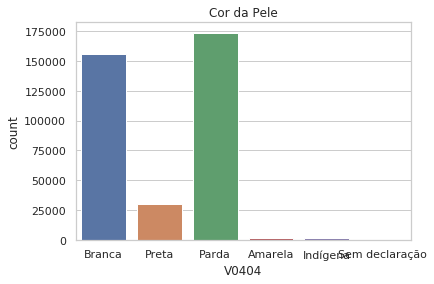

In [28]:
# Cor da pele
sns.countplot(pnad.V0404)
plt.title("Cor da Pele")
plt.show()

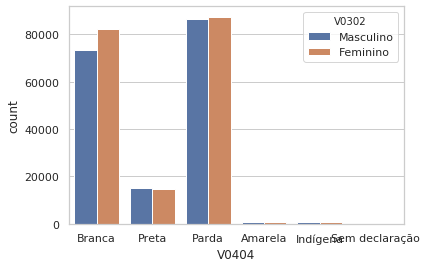

In [29]:
sns.countplot(pnad.V0404, hue=pnad.V0302)
plt.show()

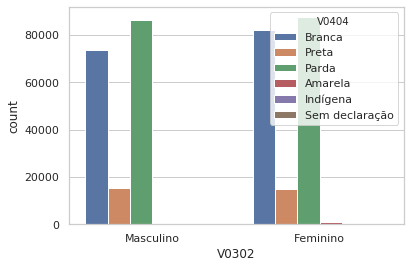

In [30]:
sns.countplot(pnad.V0302, hue=pnad.V0404)
plt.show()

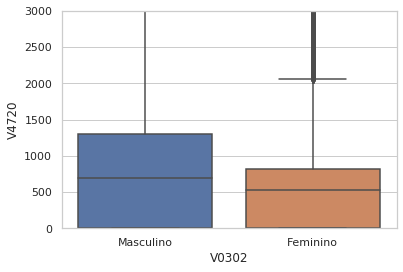

In [31]:
sns.boxplot(x=pnad.V0302, y=pnad.V4720)
plt.ylim(0, 3000)
plt.show()

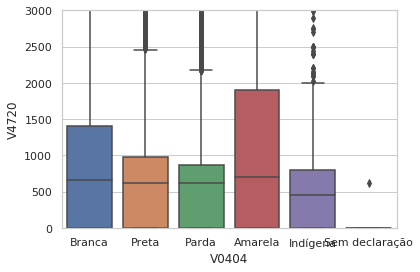

In [32]:
sns.boxplot(x=pnad.V0404, y=pnad.V4720)
plt.ylim(0, 3000)
plt.show()

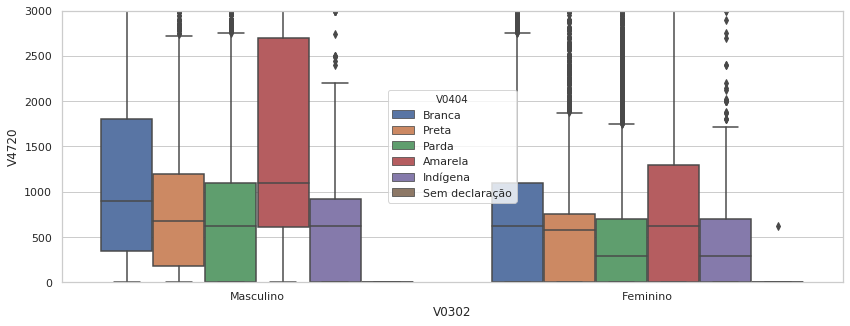

In [33]:
plt.figure(figsize=(14,5))
sns.boxplot(x=pnad.V0302, y=pnad.V4720, hue=pnad.V0404)
plt.ylim(0, 3000)
plt.show()

## Tratando a variável renda de todos os trabalhos

Vamos extrair uma subamostra de pessoas entre 18 e 80 anos

In [34]:
amostra = pnad.loc[ (pnad.V8005 >= 18) & (pnad.V8005 <= 80) & (pnad.V4720 > 0) ]

In [35]:
amostra.describe()

,V0101,V8005,V4718,V4720,V4729
count,200443.0,200443.000000,157281.000000,200443.000000,200443.000000
mean,2012.0,42.480511,1420.021827,1458.514710,547.126849
std,0.0,15.657019,2702.088821,2937.432182,261.446124
min,2012.0,18.000000,0.000000,1.000000,174.000000
25%,2012.0,30.000000,622.000000,622.000000,334.000000
50%,2012.0,40.000000,850.000000,802.000000,523.000000
75%,2012.0,54.000000,1500.000000,1500.000000,705.000000
max,2012.0,80.000000,350000.000000,351600.000000,1132.000000


# Estatísticas descritivas agrupadas

In [36]:
amostra.groupby('V0302').agg({'V4720' : 'mean'})

,V4720
V0302,
Feminino,1168.730579
Masculino,1730.798281


In [37]:
amostra.groupby('V0404').agg({'V4720' : 'mean'})

,V4720
V0404,
Amarela,2700.308628
Branca,1887.368195
Indígena,1124.150215
Parda,1111.447143
Preta,1085.736557
Sem declaração,622.000000


In [38]:
amostra.groupby(['V0404', 'V0302']).agg({'V4720' : 'mean'})

V4720
V0404          V0302                 
Amarela        Feminino   2041.119048
               Masculino  3389.325792
Branca         Feminino   1505.658569
               Masculino  2257.939164
Indígena       Feminino    923.272455
               Masculino  1307.967123
Parda          Feminino    887.403685
               Masculino  1317.552160
Preta          Feminino    869.895289
               Masculino  1277.578274
Sem declaração Feminino    622.000000

## Interação entre idade e renda

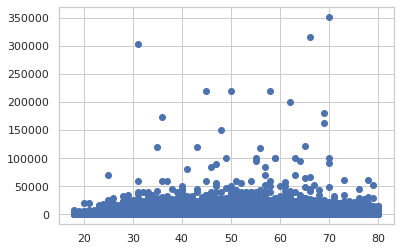

In [39]:
plt.scatter(amostra.V8005, amostra.V4720)
plt.show()

In [40]:
dado = amostra.groupby('V8005').agg({'V4720' : 'mean'})
dado.reset_index(inplace=True)
dado

,V8005,V4720
0,18,622.172790
1,19,699.414307
2,20,767.838549
3,21,808.828689
4,22,847.811980
...,...,...
58,76,1429.906854
59,77,1299.377114
60,78,1470.124408
61,79,1430.717710


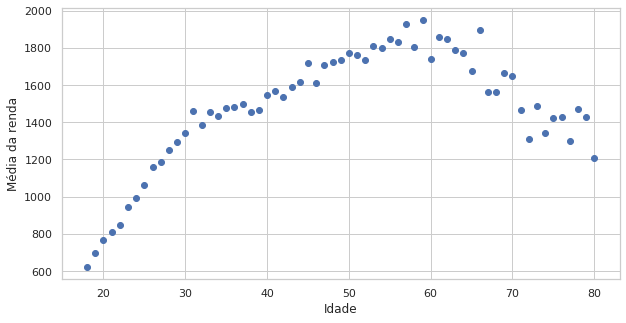

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(x=dado.V8005, y=dado.V4720)
plt.xlabel('Idade')
plt.ylabel('Média da renda')
plt.show()

In [42]:
import statsmodels.formula.api as smf

In [43]:
modelo1 = smf.ols(formula='V4720 ~ V8005', data=dado).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                  V4720   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     28.05
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.71e-06
Time:                        21:24:05   Log-Likelihood:                -439.68
No. Observations:                  63   AIC:                             883.4
Df Residuals:                      61   BIC:                             887.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1010.7813     95.624     10.570      0.0

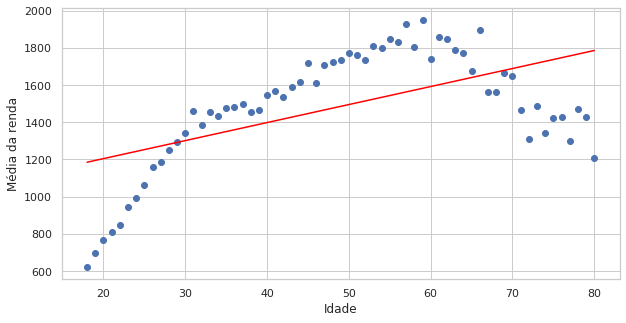

In [44]:
yhat1 = modelo1.predict(dado.V8005)

plt.figure(figsize=(10,5))
plt.scatter(x=dado.V8005, y=dado.V4720)
plt.plot(dado.V8005, yhat1, c='red')
plt.xlabel('Idade')
plt.ylabel('Média da renda')
plt.show()

In [45]:
modelo2 = smf.ols(formula='V4720 ~ V8005 + I(V8005**2)', data=dado).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  V4720   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     431.1
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           2.51e-36
Time:                        21:24:05   Log-Likelihood:                -365.52
No. Observations:                  63   AIC:                             737.0
Df Residuals:                      60   BIC:                             743.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -720.2850     78.255     -9.204

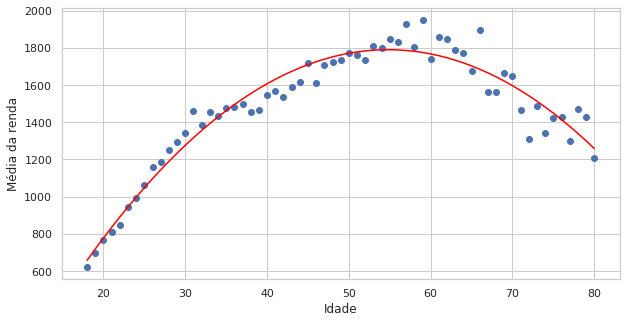

In [46]:
yhat2 = modelo2.predict(dado.V8005)

plt.figure(figsize=(10,5))
plt.scatter(x=dado.V8005, y=dado.V4720)
plt.plot(dado.V8005, yhat2, c='red')
plt.xlabel('Idade')
plt.ylabel('Média da renda')
plt.show()

---

## Escolaridade

Vamos tratar a variável Anos Completos de Escolaridade (V4803) de modo que ela fique uma numérica. Para isso, precisaremos limpá-la primeiro.

In [47]:
import re

In [48]:
amostra.V4803.value_counts()

11 anos                           52721
15 anos ou mais                   22117
Sem instrução e menos de 1 ano    20014
8 anos                            19748
4 anos                            18552
5 anos                            11224
3 anos                             7985
7 anos                             6845
6 anos                             6560
2 anos                             6003
10 anos                            5942
12 anos                            5551
9 anos                             5144
1 ano                              4019
14 anos                            3871
13 anos                            3544
Não determinados                    603
Name: V4803, dtype: int64

In [49]:
amostra.loc[amostra.V4803 == 'Sem instrução e menos de 1 ano', 'V4803'] = '0'

/home/neylson/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [50]:
anos_mais = re.compile(' anos ou mais')
anos = re.compile(' anos')
ano = re.compile(' ano')

In [51]:
amostra['V4803'] = amostra['V4803'].apply(lambda linha: anos_mais.sub('', linha))
amostra['V4803'] = amostra['V4803'].apply(lambda linha: anos.sub('', linha))
amostra['V4803'] = amostra['V4803'].apply(lambda linha: ano.sub('', linha))

/home/neylson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/neylson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/neylson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [52]:
amostra.V4803.value_counts()

11                   52721
15                   22117
0                    20014
8                    19748
4                    18552
5                    11224
3                     7985
7                     6845
6                     6560
2                     6003
10                    5942
12                    5551
9                     5144
1                     4019
14                    3871
13                    3544
Não determinados       603
Name: V4803, dtype: int64

In [53]:
amostra['V4803'] = pd.to_numeric(amostra['V4803'], errors='coerce')

/home/neylson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
pd.isnull(amostra.V4803).sum()

603

In [55]:
amostra.V4803.describe()

count    199840.000000
mean          8.005640
std           4.599891
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          15.000000
Name: V4803, dtype: float64

In [56]:
amostra

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15.0,3000.0,3000.0,232
1,2012,Rondônia,Feminino,48,Branca,15.0,3000.0,3000.0,232
2,2012,Rondônia,Feminino,23,Branca,15.0,1100.0,1100.0,232
3,2012,Rondônia,Feminino,21,Branca,14.0,1100.0,1100.0,232
4,2012,Rondônia,Feminino,54,Branca,15.0,NaN,460.0,232
...,...,...,...,...,...,...,...,...,...
362441,2012,Distrito Federal,Masculino,49,Branca,11.0,3000.0,3000.0,290
362442,2012,Distrito Federal,Feminino,47,Branca,11.0,3000.0,3000.0,290
362443,2012,Distrito Federal,Masculino,22,Parda,15.0,1400.0,1400.0,290
362447,2012,Distrito Federal,Masculino,53,Branca,12.0,20000.0,20000.0,290


---

# Algumas análises

1) Analisar diferenças de escolaridade entre homens e mulheres.

In [57]:
amostra.groupby('V0302').agg({'V4803': 'mean'})

,V4803
V0302,
Feminino,8.229152
Masculino,7.795772


Vamos implementar testes estatísticos de hipótese. Para fazer a instalação, utilizamos `!` para executar comandos de terminal no jupyter lab

In [58]:
import pingouin as pg

In [59]:
# Fazendo um teste de média para médias de anos completos de escolaridade
pg.ttest(
    amostra.loc[amostra.V0302 == 'Masculino', 'V4803'],
    amostra.loc[amostra.V0302 == 'Feminino', 'V4803']
)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-21.043,197634.46,two-sided,3.372579e-98,"[-0.47, -0.39]",0.094,5.595e+93,1.0


In [60]:
# O mesmo teste para diferença de renda
pg.ttest(
    amostra.loc[amostra.V0302 == 'Masculino', 'V4720'],
    amostra.loc[amostra.V0302 == 'Feminino', 'V4720']
)

/home/neylson/anaconda3/lib/python3.7/site-packages/pingouin/bayesian.py:151: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,43.626,172697.66,two-sided,0.0,"[536.82, 587.32]",0.192,inf,1.0


Análise de correlação

In [61]:
pg.corr(amostra.V4803, amostra.V4720)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,199840,0.25,"[0.25, 0.25]",0.062,0.062,0.0,inf,1.0


/home/neylson/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/neylson/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


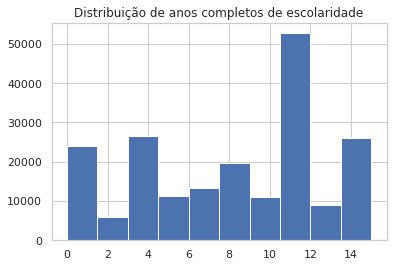

In [62]:
sns.set(style='whitegrid')

plt.hist(amostra.V4803)
plt.title("Distribuição de anos completos de escolaridade")
plt.show()

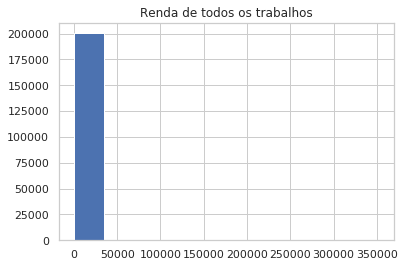

In [63]:
plt.hist(amostra.V4720)
plt.title("Renda de todos os trabalhos")
plt.show()

Para facilitar a modelagem, vamos trabalhar com o logaritmo natural da renda.

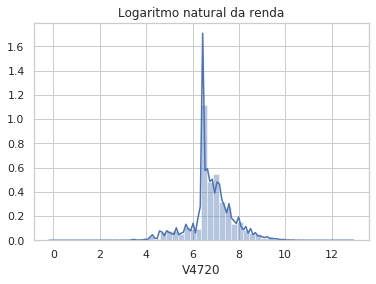

In [64]:
sns.distplot(np.log(amostra.V4720))
plt.title("Logaritmo natural da renda")
plt.show()

In [65]:
pg.corr(amostra.V4803, np.log(amostra.V4720))

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,199840,0.417,"[0.41, 0.42]",0.174,0.174,0.0,inf,1.0


---

# Finalmente, vamos ao nosso modelo estatístico

In [66]:
amostra['lnrenda'] = np.log(amostra.V4720)

/home/neylson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
amostra

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729,lnrenda
0,2012,Rondônia,Masculino,48,Branca,15.0,3000.0,3000.0,232,8.006368
1,2012,Rondônia,Feminino,48,Branca,15.0,3000.0,3000.0,232,8.006368
2,2012,Rondônia,Feminino,23,Branca,15.0,1100.0,1100.0,232,7.003065
3,2012,Rondônia,Feminino,21,Branca,14.0,1100.0,1100.0,232,7.003065
4,2012,Rondônia,Feminino,54,Branca,15.0,NaN,460.0,232,6.131226
...,...,...,...,...,...,...,...,...,...,...
362441,2012,Distrito Federal,Masculino,49,Branca,11.0,3000.0,3000.0,290,8.006368
362442,2012,Distrito Federal,Feminino,47,Branca,11.0,3000.0,3000.0,290,8.006368
362443,2012,Distrito Federal,Masculino,22,Parda,15.0,1400.0,1400.0,290,7.244228
362447,2012,Distrito Federal,Masculino,53,Branca,12.0,20000.0,20000.0,290,9.903488


In [68]:
modelo = smf.ols(formula='lnrenda ~ V8005 + I(V8005**2) + V4803 + V0302 + V0404', data=amostra).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                lnrenda   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                 1.211e+04
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:24:09   Log-Likelihood:            -2.2573e+05
No. Observations:              199840   AIC:                         4.515e+05
Df Residuals:                  199830   BIC:                         4.516e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [69]:
neylson = pd.DataFrame({
    'V0302':'Masculino',
    'V8005':33,
    'V0404': 'Parda',
    'V4803': 15
}, index=[0])

In [70]:
np.exp(modelo.predict(neylson))

0    1854.130879
dtype: float64